# ***CAR PRICE PREDICTION ***

## Task:
### • Numerous factors contribute to a car's price, encompassing brand reputation, car features, horsepower, mileage efficiency, and more. 
### • Car price prediction stands as a significant domain within machine learning research.
### • If you seek to master the art of training a car price prediction model, this project presents a valuable learning opportunity.

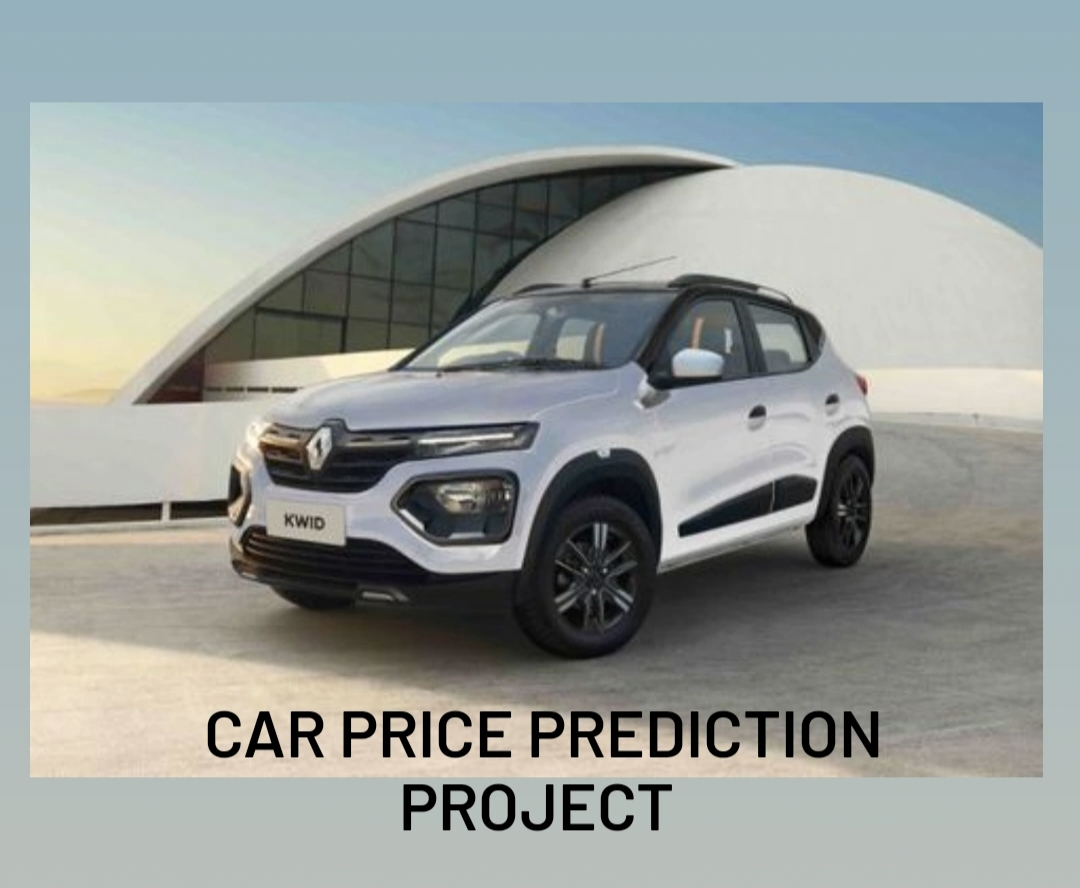

In [1]:
# displaying image of a car
from IPython.display import Image
Image(filename="IMG_20231203_145416.jpg")

# DATA DICTONARY :
1.Car_ID: Unique id of each observation (Interger)

2.Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		

3.carCompany: Name of car company (Categorical)

4.fueltype: Car fuel type i.e gas or diesel (Categorical)

5.aspiration: Aspiration used in a car (Categorical)

6.doornumber: Number of doors in a car (Categorical)

7.carbody	: body of car (Categorical)

8.drivewheel: type of drive wheel (Categorical)

9.enginelocation: Location of car engine (Categorical)

10.wheelbase: Weelbase of car (Numeric)

11.carlength: Length of car (Numeric)

12.carwidth	: Width of car (Numeric)

13.carheight: height of car (Numeric)

14.curbweight: The weight of a car without occupants or baggage. (Numeric)

15.enginetype: Type of engine. (Categorical)

16.cylindernumber: cylinder placed in the car (Categorical)

17.enginesize: Size of car (Numeric)

18.fuelsystem: Fuel system of car (Categorical)

19.boreratio: Boreratio of car (Numeric)

20.stroke: Stroke or volume inside the engine (Numeric)

21.compressionratio	: compression ratio of car (Numeric)

22.horsepower: Horsepower (Numeric)		

23.peakrpm	: car peak rpm (Numeric)		

24.citympg	: Mileage in city (Numeric)		

25.highwaympg	: Mileage on highway (Numeric)		

26.price(Dependent variable)	: Price of car (Numeric)		


### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math

In [3]:
# Loading dataset
data=pd.read_csv("CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# droppin unwanted column
data.drop("car_ID",axis=1,inplace=True)

# Basic checks

In [5]:
data.head(5) # displays initial 5 rows

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.tail(5) # displays final 5 rows

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
data.shape # to get the number of rows and columns

(205, 25)

#### dataset contains 205 rows and 25 columns

In [8]:
data.describe() # to get the statistical information about numerical data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
data.describe(include="O") # # to get the statistical information about categorical column

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
data.info() # Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
# checking for duplicate rows
data.duplicated().sum() 

0

In [12]:
data.dtypes # to get the data types of columns

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# EDA (Exploratory Data Analysis)

## Univariate Analysis

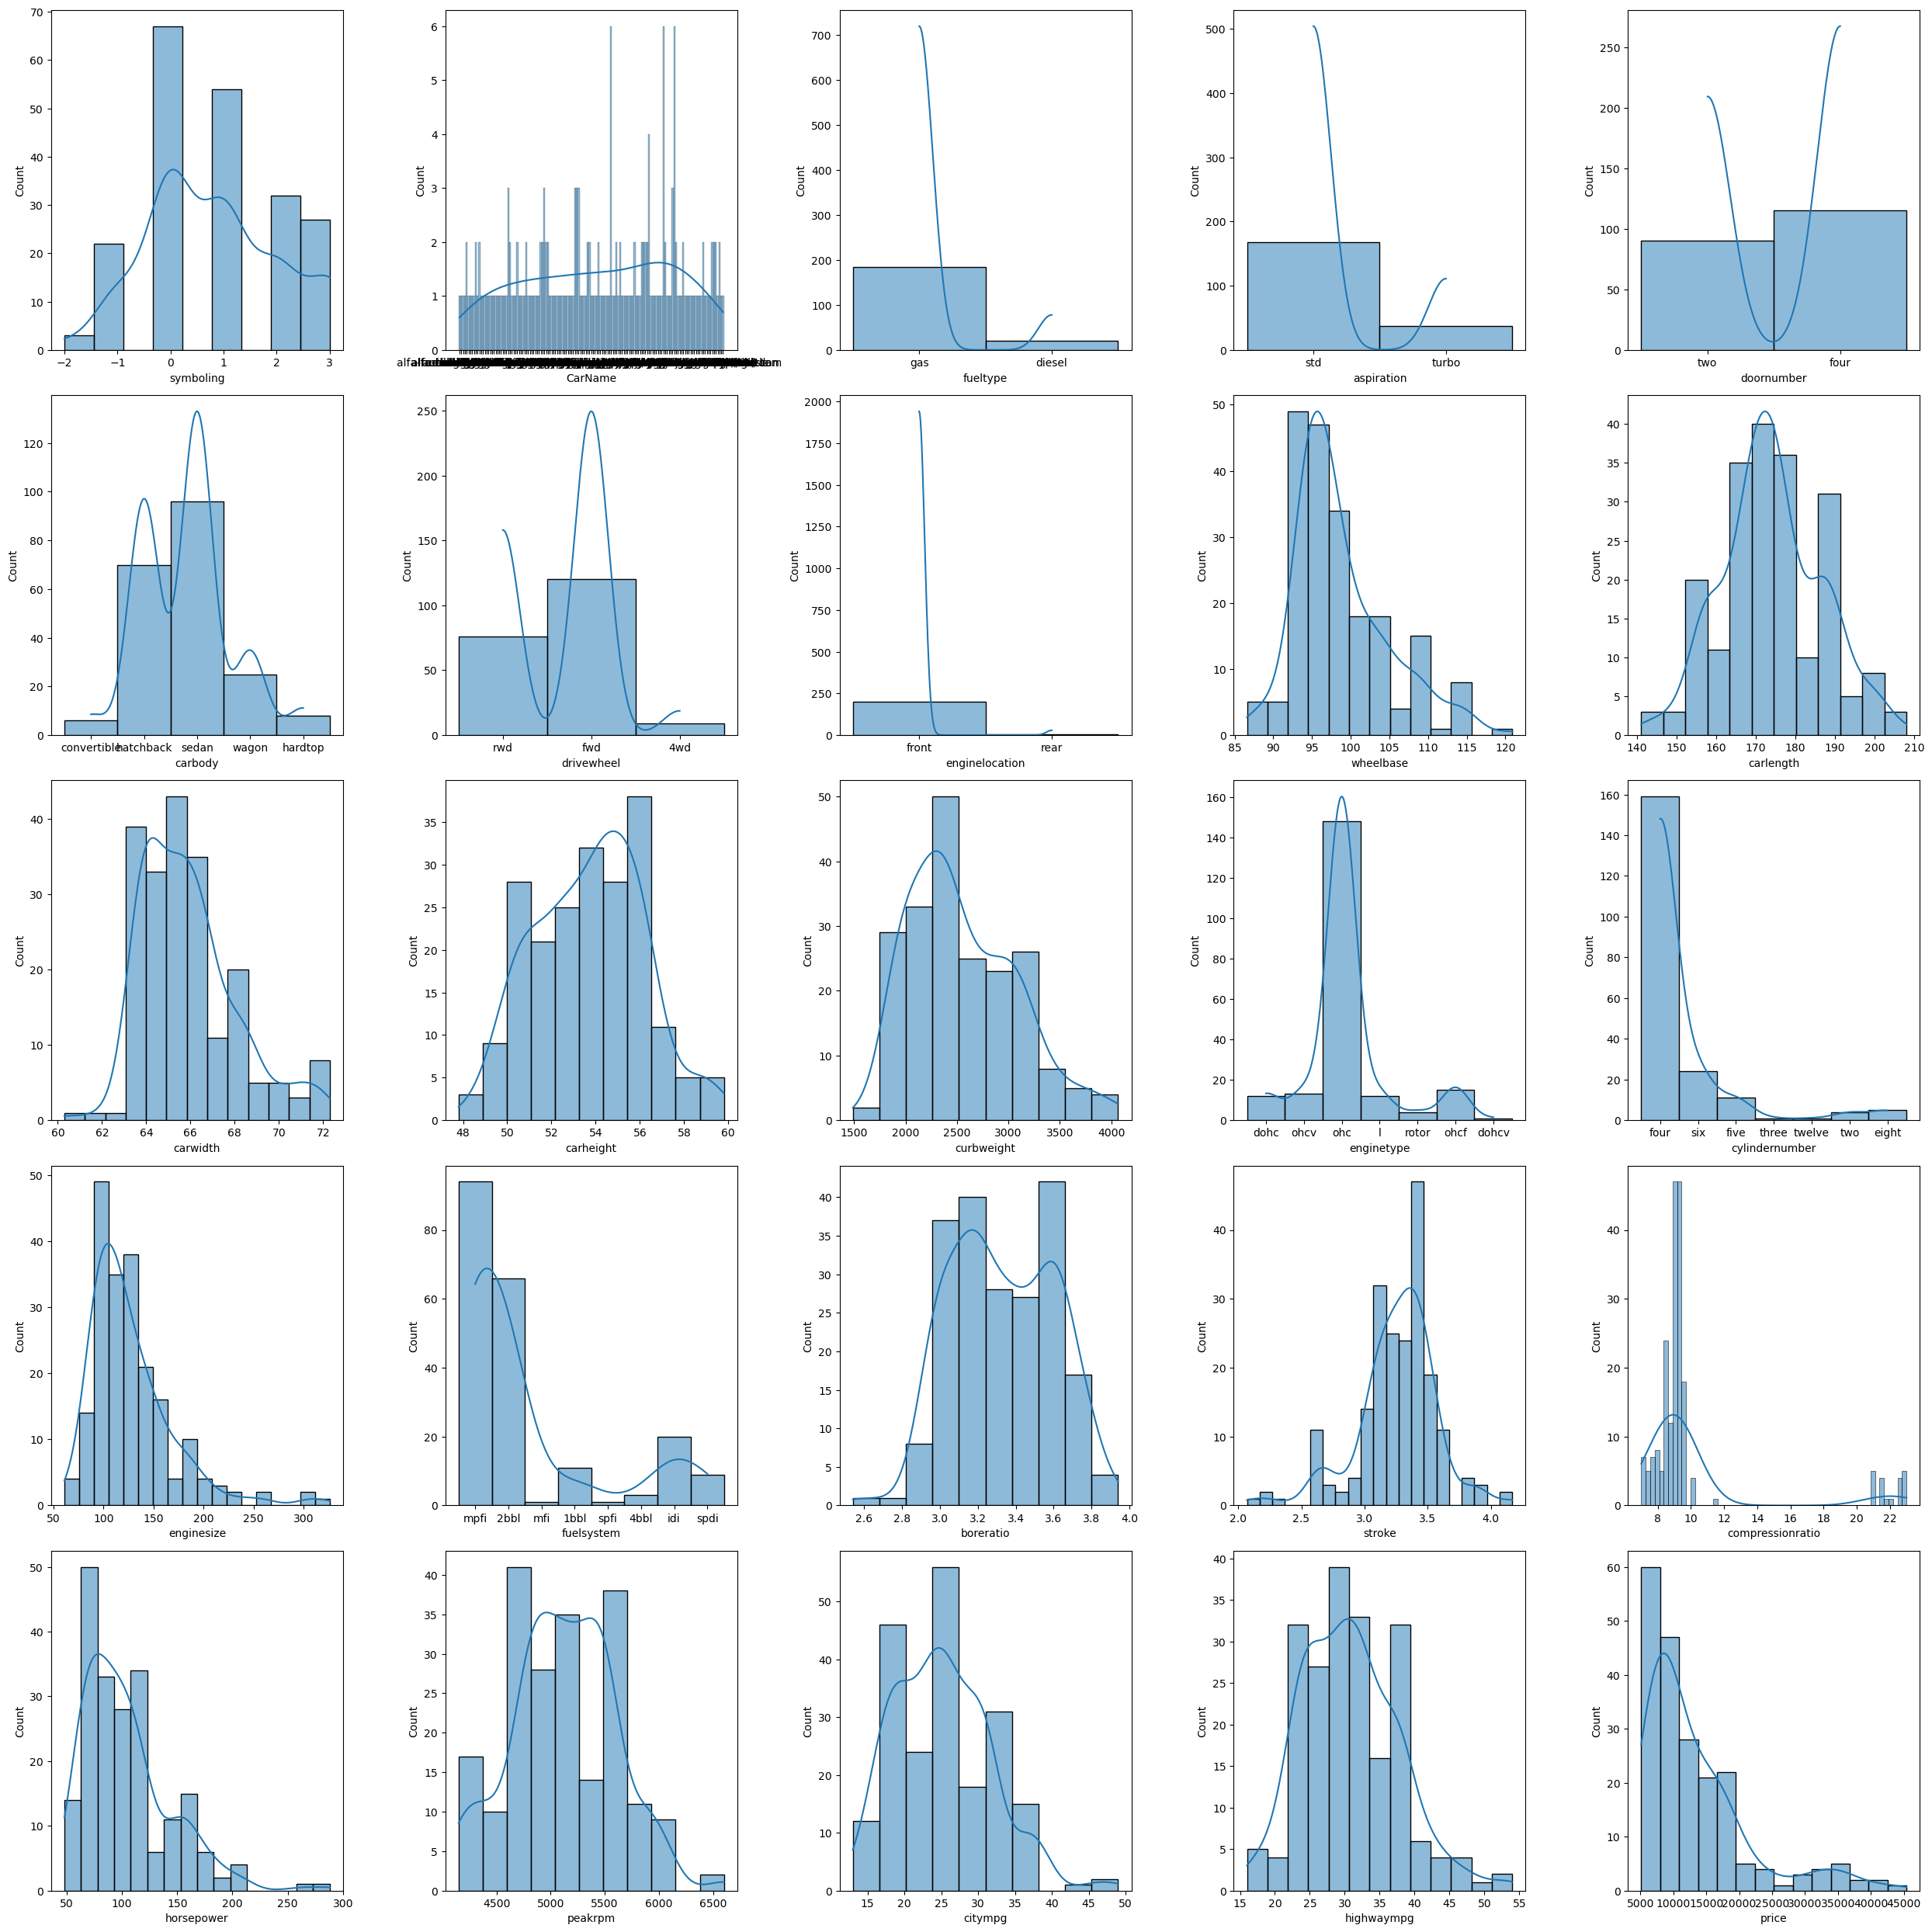

In [13]:
plt.figure(figsize=(25,25))
plotnumber=1 # initialization of plotnumber
for i in data: # using for loop
    plt.subplot(5,5,plotnumber)
    sns.histplot(x=data[i],kde=True) # plotting histogram 
    plotnumber+=1 # increamentation
plt.tight_layout() 

# Observations:

1.fueltype of most of the cars are gas over diesel.

2.in the column "carbody" most of the cars "sedan" bodytype.

3.in the column "drivewheel" ,fwd has maximum value counts as compared to others.

4.maximum width of the car ranges from 63-70.

5.car height ranges from 50 t0 58.

6.most of the cars has engine type "ohc".

7.max enginesize ranges from 100-150.

8.maximum citympg is above 50.

9.and highwaympg is around 40.

10.we can observe that price of the car is gradually decreasing.



## Bivariate Analysis

In [14]:
data.columns # getting names of columns present in the dataset

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

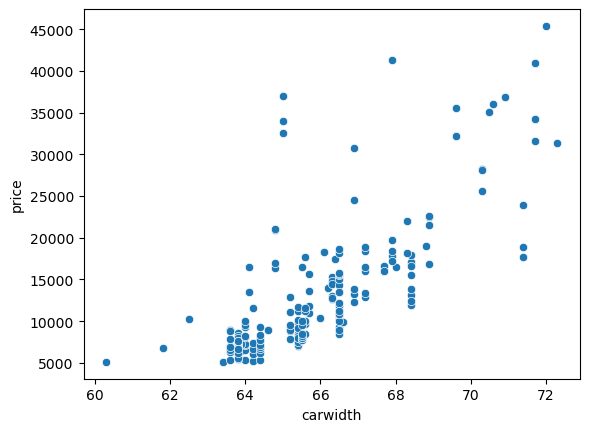

In [15]:
sns.scatterplot(x=data.carwidth,y=data.price) # using scatterplot to display relation between carwidth and price
plt.show()

### As width of the car increases price also increases

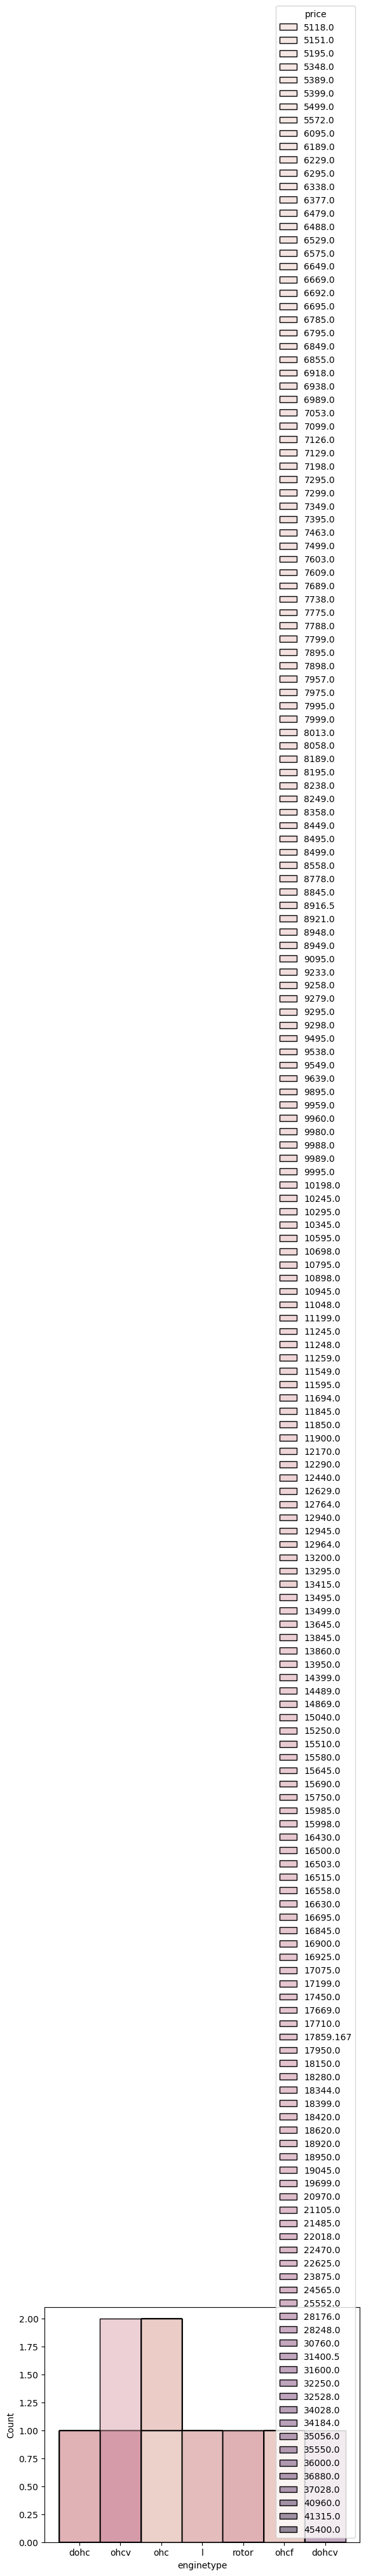

In [16]:
sns.histplot(x=data.enginetype,hue=data.price)
plt.show()

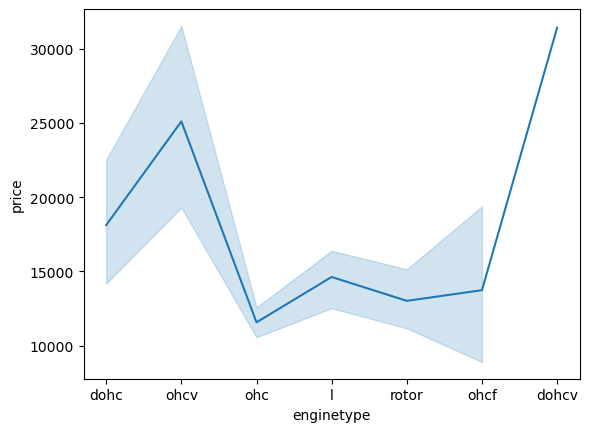

In [17]:
sns.lineplot(x=data.enginetype,y=data.price)
plt.show()

### cars which are having enginetype of "dohCV" are expensive

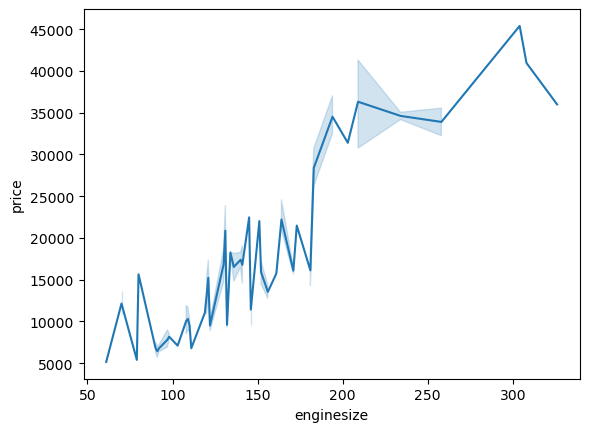

In [18]:
sns.lineplot(x=data.enginesize,y=data.price)
plt.show()

### As engine size increases price goes up

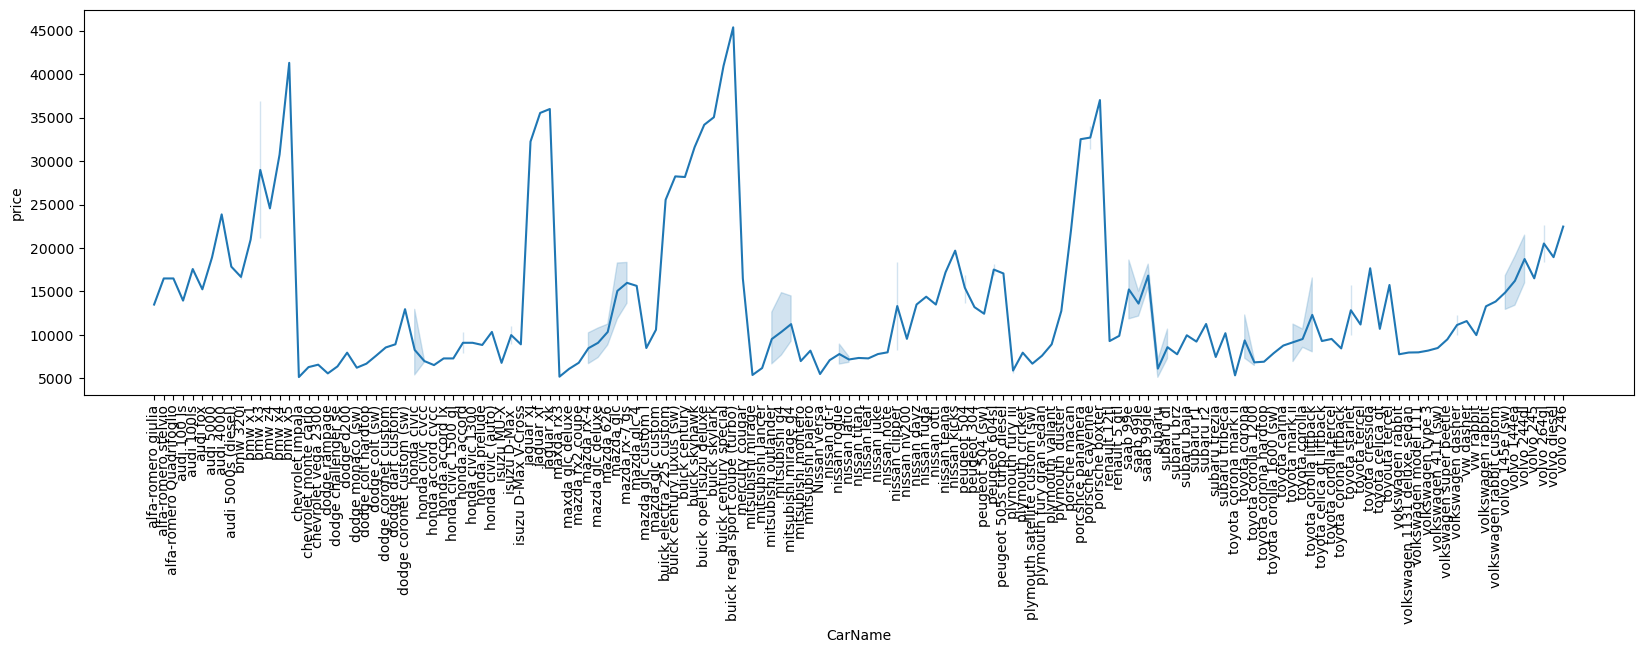

In [19]:
plt.figure(figsize=(20,5))
sns.lineplot(x=data.CarName,y=data.price) # to get the price of  specific carnames
plt.xticks(rotation=90)

plt.show()

# data preprocessing

In [20]:
# checking for null values
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### No null values present

# Encoding

In [21]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [22]:
lb=LabelEncoder()
for column in data.columns: # using for loop
    if data[column].dtype=="object":
        data[column]=lb.fit_transform(data[column])

In [23]:
(data.dtypes=="object").sum() # no categorical columns left

0

# handling outliers

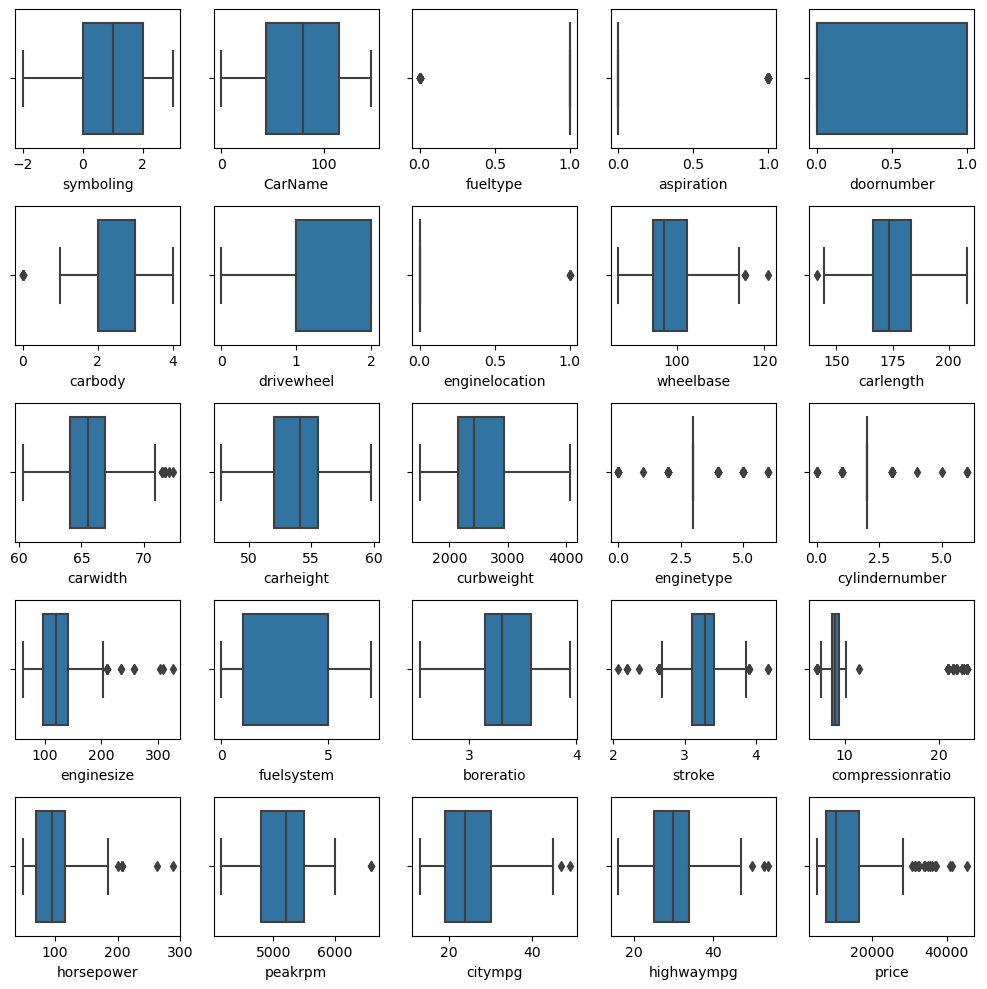

In [24]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1

for column in data:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(x = data[column])
        plotnumber+=1
plt.tight_layout()

In [25]:
# handling outliers manually
data.loc[data.carbody<1,"carbody"]=np.median(data.carbody)
data.loc[data.enginesize>200,"enginesize"]=np.median(data.enginesize)
data.loc[data.compressionratio>11,"compressionratio"]=np.median(data.compressionratio)
data.loc[data.horsepower>200,"horsepower"]=np.median(data.horsepower)

In [26]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,3,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,3,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Checking correlation

In [27]:
data.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.507184,-0.041671,0.212471,-0.531954,-0.357612,...,-0.059513,0.091163,-0.130051,-0.008735,0.043782,0.010813,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.082758,-0.016129,0.055968,0.014550,0.053016,...,0.041144,0.123845,0.188598,-0.181775,0.150478,-0.129367,-0.138309,0.093437,0.102895,-0.231439
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.134267,-0.132257,0.040070,-0.308346,-0.212679,...,-0.187359,0.041529,-0.054451,-0.241829,-0.072367,0.160936,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.017576,0.066465,-0.057191,0.257611,0.234539,...,0.280748,0.288086,0.212614,0.222982,-0.519807,0.334712,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.663945,0.098954,0.137757,-0.447357,-0.398568,...,-0.047916,0.015519,-0.119258,0.011082,0.026246,0.035192,0.247668,0.012417,0.036330,-0.031835
carbody,-0.507184,0.082758,-0.134267,0.017576,-0.663945,1.000000,-0.073161,-0.173227,0.350542,0.357428,...,0.008278,0.028244,0.084618,-0.099715,-0.032618,-0.027580,-0.120538,-0.049863,-0.091773,0.031481
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.073161,1.000000,0.147865,0.459745,0.485649,...,0.480503,0.424686,0.481827,0.071591,0.052774,0.491561,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.173227,0.147865,1.000000,-0.187790,-0.050989,...,0.326036,0.105971,0.185042,-0.138455,0.123696,-0.020976,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.350542,0.459745,-0.187790,1.000000,0.874587,...,0.423360,0.384601,0.488750,0.160959,-0.230926,0.483643,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.357428,0.485649,-0.050989,0.874587,1.000000,...,0.582145,0.557810,0.606454,0.129533,-0.261606,0.637429,-0.287242,-0.670909,-0.704662,0.682920


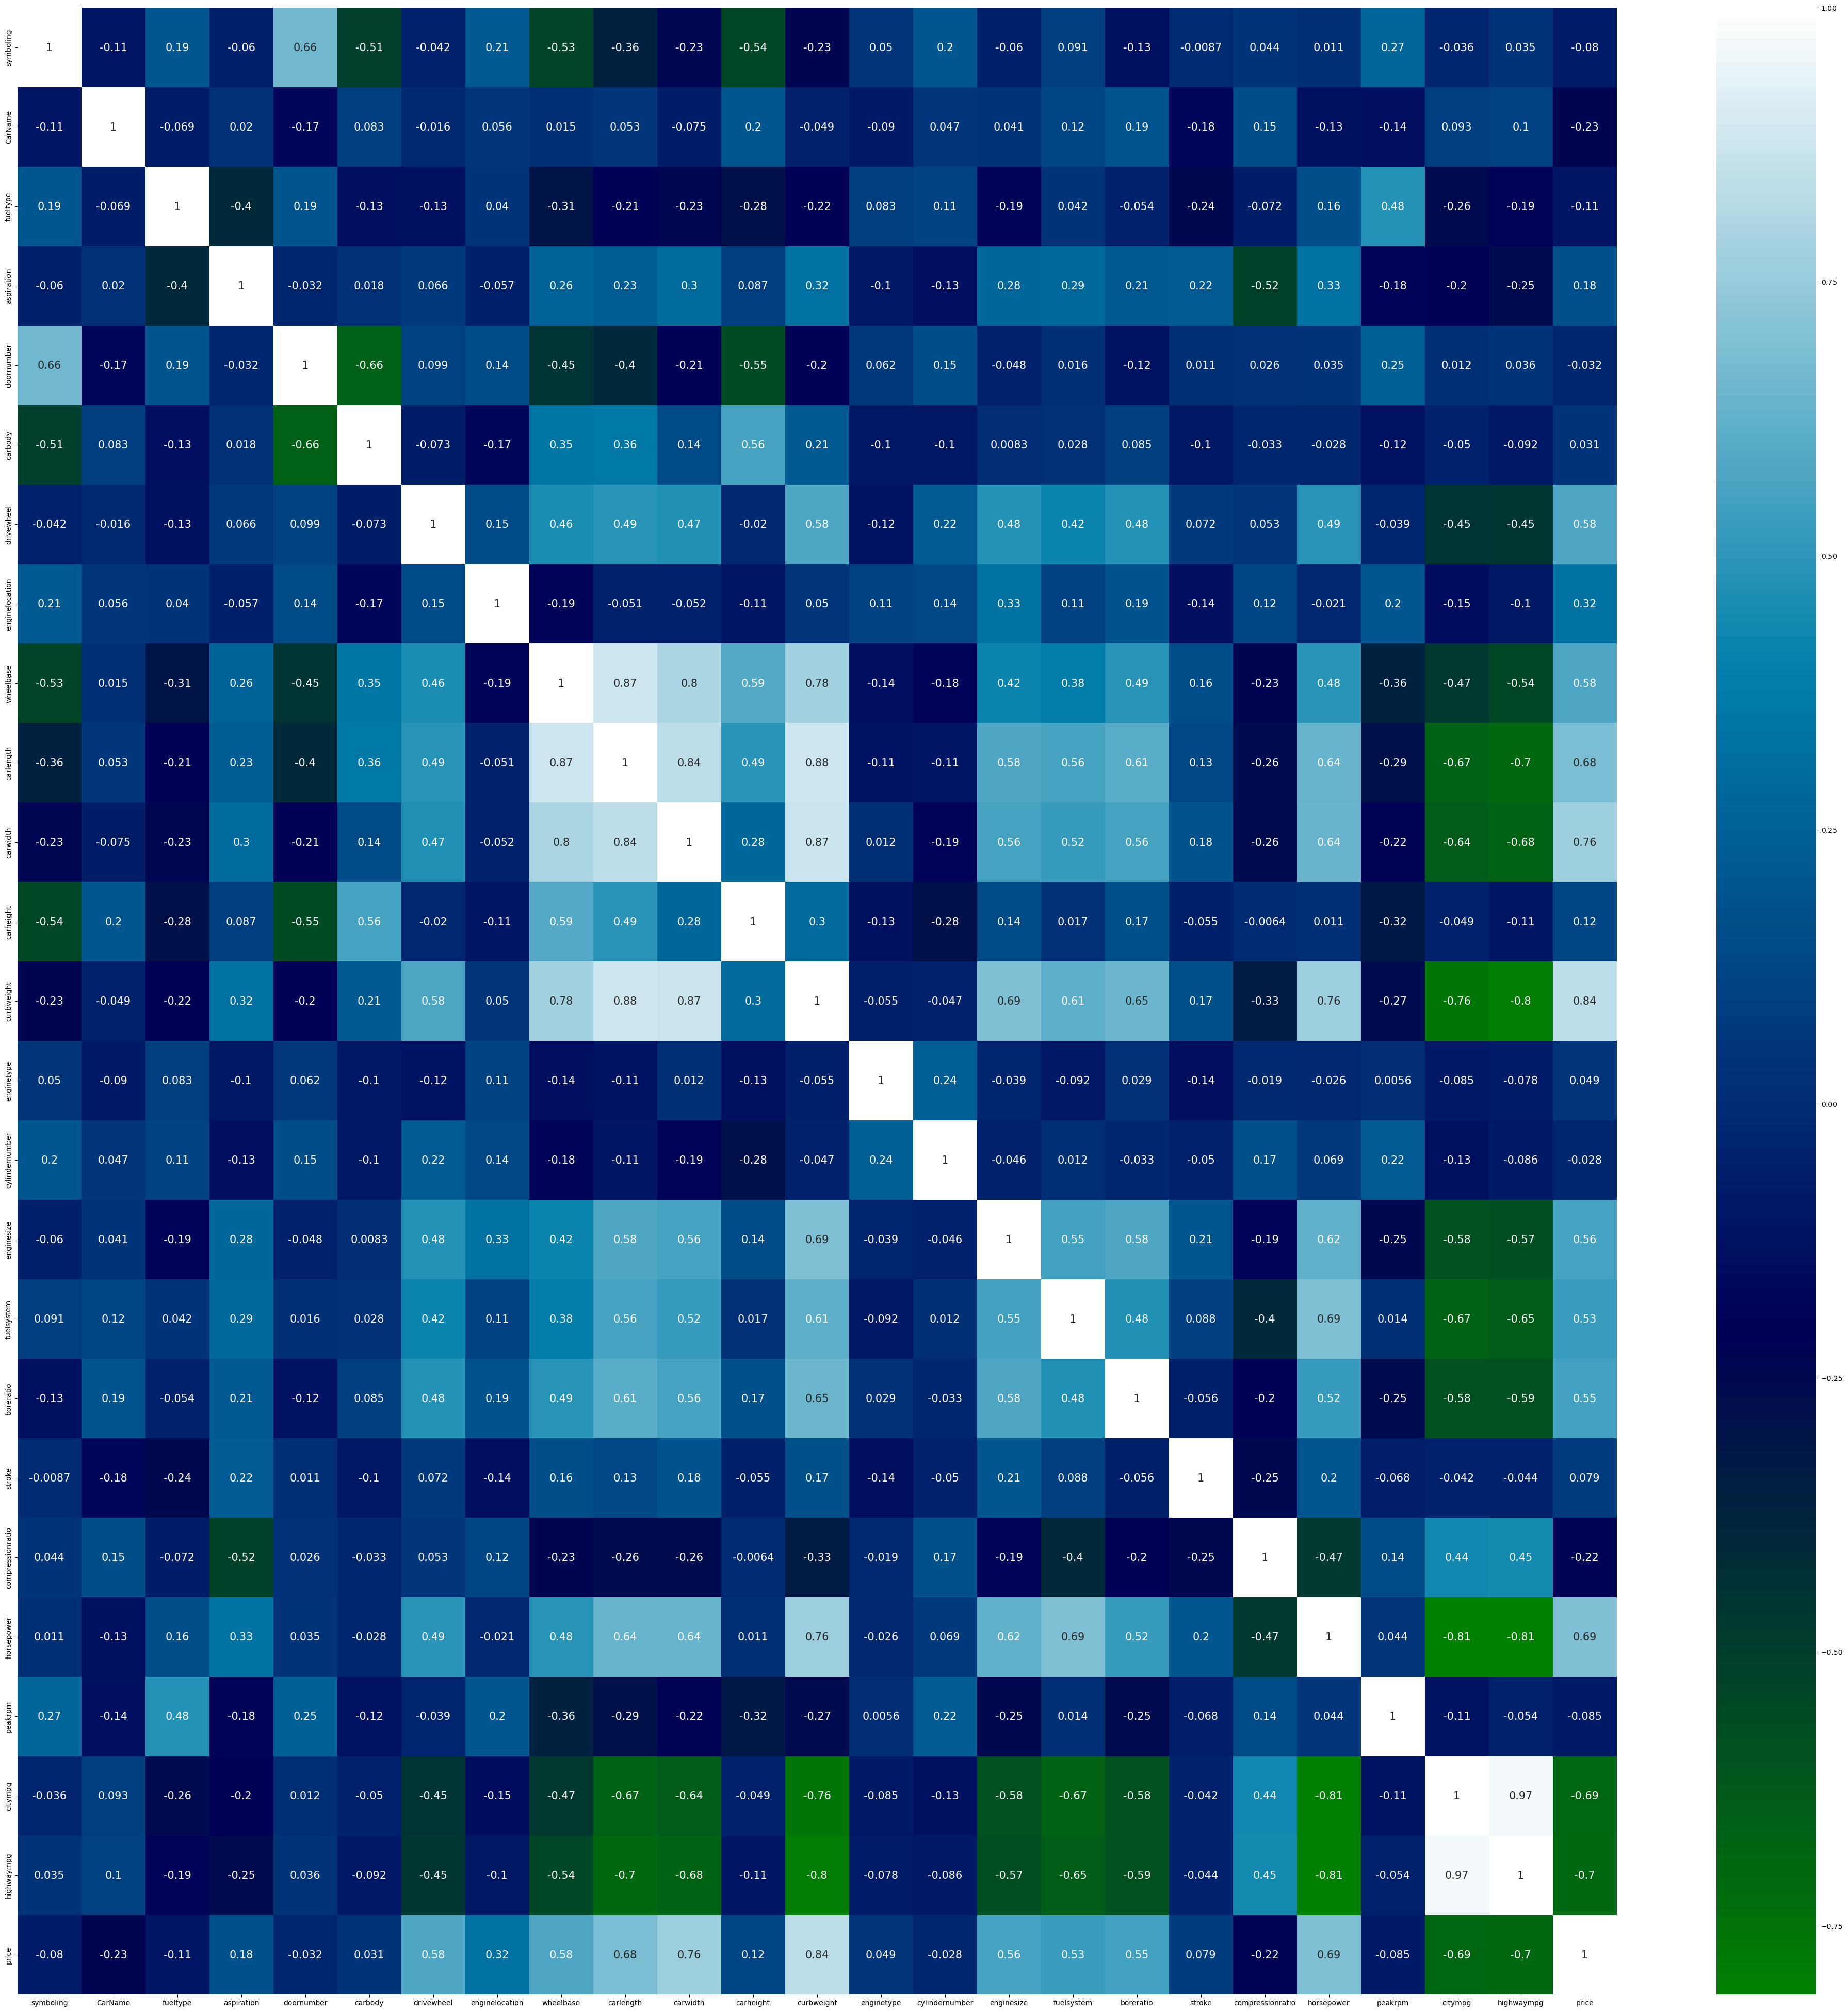

In [28]:
# using heatmap to visualize correlated columns
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(),annot=True,cmap="ocean", annot_kws={"size":15})
plt.show()

In [29]:
# using threshold method to get highly correlated features
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [30]:
corr_features=correlation(data,0.9)
len(set(corr_features))

1

In [31]:
corr_features # column which is highly correlated

{'highwaympg'}

In [32]:
# dropping highly correlated column
data.drop("highwaympg",axis=1,inplace=True)

# Selecting dependent and independent values

In [33]:
x=data.drop("price",axis=1)
y=data[["price"]]

In [34]:
x.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,3,2,1,0,1,3,2,0,88.6,168.8,...,0,2,130,5,3.47,2.68,9.0,111,5000,21
1,3,3,1,0,1,3,2,0,88.6,168.8,...,0,2,130,5,3.47,2.68,9.0,111,5000,21
2,1,1,1,0,1,2,2,0,94.5,171.2,...,5,3,152,5,2.68,3.47,9.0,154,5000,19
3,2,4,1,0,0,3,1,0,99.8,176.6,...,3,2,109,5,3.19,3.40,10.0,102,5500,24
4,2,5,1,0,0,3,0,0,99.4,176.6,...,3,1,136,5,3.19,3.40,8.0,115,5500,18


In [35]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


# Scaling the data (Normalization)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

# Splitting the data into train and test set

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

# Model building
## Linear Regression

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [39]:
# calculating score of performance metrics
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=math.sqrt(mean_squared_error(y_test, y_pred))
r2score=r2_score(y_test, y_pred)


In [40]:
print("metrics on test data \n")
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("r2score:",r2score)


metrics on test data 

mse: 8481137.928772159
mae: 2140.505078573605
rmse: 2912.2393323303904
r2score: 0.8775894639056243


In [41]:
adj_r2score = 1-(1-0.8775894639056243)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# KNN 

In [42]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

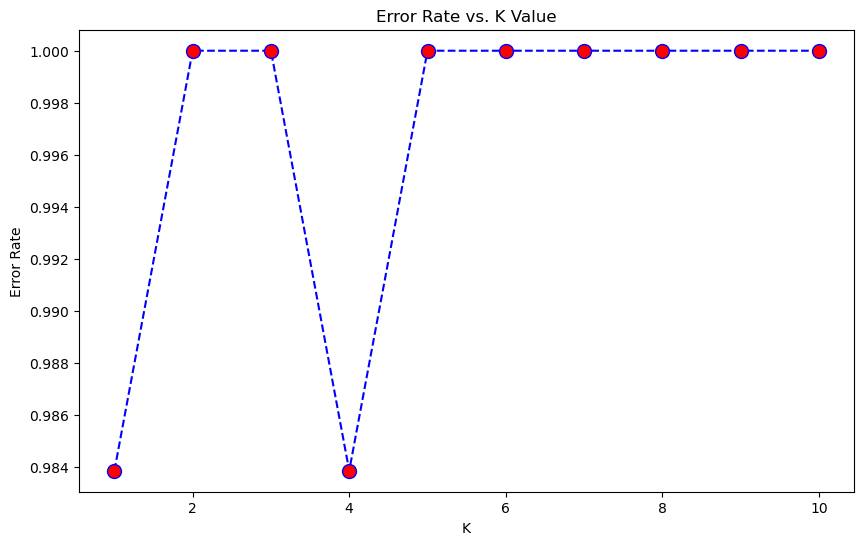

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [44]:
# chosing k value as 4
knn1 = KNeighborsRegressor(n_neighbors=4)
knn1.fit(x_train,y_train)
y_pred2 = knn1.predict(x_test)

In [45]:
# calculating score of performance metrics

mse2=mean_squared_error(y_test, y_pred2)
mae2=mean_absolute_error(y_test, y_pred2)
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
r2score2=r2_score(y_test, y_pred2)

In [46]:
print("metrics on test data \n")
print("mse:",mse2)
print("mae:",mae2)
print("rmse:",rmse2)
print("r2score:",r2score2)

metrics on test data 

mse: 16299708.948028453
mae: 2466.2789032258065
rmse: 4037.289802333795
r2score: 0.7647419335391809


In [47]:
adj_r2score2 = 1-(1-0.7647419335391809)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# SVM

In [48]:
svr=SVR()
svr.fit(x_train, y_train)
y_pred3 = svr.predict(x_test)

In [49]:
# calculating score of performance metrics

mse3=mean_squared_error(y_test, y_pred3)
mae3=mean_absolute_error(y_test, y_pred3)
rmse3=math.sqrt(mean_squared_error(y_test, y_pred3))
r2score3=r2_score(y_test, y_pred3)

In [50]:
print("metrics on test data \n")
print("mse:",mse3)
print("mae:",mae3)
print("rmse:",rmse3)
print("r2score:",r2score3)

metrics on test data 

mse: 73896546.60533406
mae: 5463.339936013964
rmse: 8596.310057538296
r2score: -0.06656865640570175


In [51]:
adj_r2score3 = 1-(1-(-0.06656865640570175)*(143-23)/(143-23-1))
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# Decision Tree

In [52]:
dt=DecisionTreeRegressor()  
dt.fit(x_train,y_train)
y_pred4 = dt.predict(x_test)

In [53]:
# calculating score of performance metrics

mse4=mean_squared_error(y_test, y_pred4)
mae4=mean_absolute_error(y_test, y_pred4)
rmse4=math.sqrt(mean_squared_error(y_test, y_pred4))
r2score4=r2_score(y_test, y_pred4)

In [54]:
print("metrics on test data \n")
print("mse:",mse4)
print("mae:",mae4)
print("rmse:",rmse4)
print("r2score:",r2score4)

metrics on test data 

mse: 18629911.611578856
mae: 2355.634403225806
rmse: 4316.238131936057
r2score: 0.731109494160254


In [55]:
adj_r2score4 = 1-(1-0.731109494160254)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# Random Forest

In [56]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred5 = rf.predict(x_test)

In [57]:
# calculating score of performance metrics

mse5=mean_squared_error(y_test, y_pred5)
mae5=mean_absolute_error(y_test, y_pred5)
rmse5=math.sqrt(mean_squared_error(y_test, y_pred5))
r2score5=r2_score(y_test, y_pred5)

In [58]:
print("metrics on test data \n")
print("mse:",mse5)
print("mae:",mae5)
print("rmse:",rmse5)
print("r2score:",r2score5)

metrics on test data 

mse: 9924726.426128691
mae: 1780.294564516129
rmse: 3150.3533811508655
r2score: 0.8567537643396971


In [59]:
adj_r2score5 = 1-(1-0.8567537643396971)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# Gradient Boosting

In [60]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred6 = gb.predict(x_test)

In [61]:
# calculating score of performance metrics

mse6=mean_squared_error(y_test, y_pred6)
mae6=mean_absolute_error(y_test, y_pred6)
rmse6=math.sqrt(mean_squared_error(y_test, y_pred6))
r2score6=r2_score(y_test, y_pred6)

In [62]:
print("metrics on test data \n")
print("mse:",mse6)
print("mae:",mae6)
print("rmse:",rmse6)
print("r2score:",r2score6)

metrics on test data 

mse: 10316780.14045875
mae: 1854.1829581394927
rmse: 3211.97449249815
r2score: 0.8510951480370281


In [63]:
adj_r2score6 = 1-(1-0.8510951480370281)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# XG Boosting

In [64]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred7 = xgb.predict(x_test)

In [65]:
# calculating score of performance metrics

mse7=mean_squared_error(y_test, y_pred7)
mae7=mean_absolute_error(y_test, y_pred7)
rmse7=math.sqrt(mean_squared_error(y_test, y_pred7))
r2score7=r2_score(y_test, y_pred7)

In [66]:
print("metrics on test data \n")
print("mse:",mse7)
print("mae:",mae7)
print("rmse:",rmse7)
print("r2score:",r2score7)

metrics on test data 

mse: 8702502.16083225
mae: 1827.786368951613
rmse: 2950.0003662427316
r2score: 0.8743944546337354


In [67]:
adj_r2score7 = 1-(1-0.8743944546337354)*(143-23)/(143-23-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8765608039384447


# Comparing results

In [68]:
results={"Model":["linear regression","KNN","SVM","Decision tree","Random forest","Gradient boosting","XG Boost"],
        "Mean squared error":[mse,mse2,mse3,mse4,mse5,mse6,mse7],
        "Mean absolute error":[mae,mae2,mae3,mae4,mae5,mae6,mae7],
        "root Mean squared error":[rmse,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7],
        "r2_score":[r2score,r2score2,r2score3,r2score4,r2score5,r2score6,r2score7],
        "adjusted r2 score":[adj_r2score,adj_r2score2,adj_r2score3,adj_r2score4,adj_r2score5,adj_r2score6,adj_r2score7]}

In [69]:
a=pd.DataFrame(results)
a

,Model,Mean squared error,Mean absolute error,root Mean squared error,r2_score,adjusted r2 score
0,linear regression,8.481138e+06,2140.505079,2912.239332,0.877589,0.876561
1,KNN,1.629971e+07,2466.278903,4037.289802,0.764742,0.762765
2,SVM,7.389655e+07,5463.339936,8596.310058,-0.066569,-0.067128
3,Decision tree,1.862991e+07,2355.634403,4316.238132,0.731109,0.728850
4,Random forest,9.924726e+06,1780.294565,3150.353381,0.856754,0.855550
5,Gradient boosting,1.031678e+07,1854.182958,3211.974492,0.851095,0.849844
6,XG Boost,8.702502e+06,1827.786369,2950.000366,0.874394,0.873339


In [70]:
a.sort_values(by="adjusted r2 score")

,Model,Mean squared error,Mean absolute error,root Mean squared error,r2_score,adjusted r2 score
2,SVM,7.389655e+07,5463.339936,8596.310058,-0.066569,-0.067128
3,Decision tree,1.862991e+07,2355.634403,4316.238132,0.731109,0.728850
1,KNN,1.629971e+07,2466.278903,4037.289802,0.764742,0.762765
5,Gradient boosting,1.031678e+07,1854.182958,3211.974492,0.851095,0.849844
4,Random forest,9.924726e+06,1780.294565,3150.353381,0.856754,0.855550
6,XG Boost,8.702502e+06,1827.786369,2950.000366,0.874394,0.873339
0,linear regression,8.481138e+06,2140.505079,2912.239332,0.877589,0.876561


# Conclusion
## From the above table we can conclude that "Linear regression" performs well on this dataset with highest performance metrics.
## so we can conclude that linear regression is best suited algorithm for this data.